In [1]:
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import numpy as np
import os
from sklearn import svm
import pandas as pd
from sklearn import metrics
import seaborn as sns

In [2]:
def download_gz_from_url_and_extract(url,filename,loc=r"C://Users//chenb//scikit_learn_data//",
                         extract=False,buffer=None,dtype=None,offset=0):
    # url = http://yann.lecun.com/exdb/mnist/
    # loc = 'C:\\Users\\chenb\\scikit_learn_data\\'
    # 判断是否已经下载了该文件，未下载则下载否则直接解压即可
    if not os.path.exists(loc + filename) :
        from urllib.request import urlretrieve # 从网站下载文件到filename,尾部是指定的文件
        urlretrieve(url=url+filename,filename=loc+filename)
    if extract :
        import gzip
        with gzip.open(filename=loc+filename,mode="rb") as f :
            data = np.frombuffer(buffer=f.read(),dtype=dtype,offset=offset) # offset:从该偏移量开始读取缓冲区（字节）
    return data
patch_kw = {'url':"http://yann.lecun.com/exdb/mnist/",
            'loc':r"C://Users//chenb//scikit_learn_data//",
            'extract':True,
            'dtype':np.uint8}
filenames = ["train-images-idx3-ubyte.gz",'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz','t10k-labels-idx1-ubyte.gz']
lst = []
for filename ,offset in  zip(filenames,[16,8,16,8]) :
    lst.append(download_gz_from_url_and_extract(filename=filename,offset=offset,**patch_kw))
train_data ,train_y ,test_data ,test_y =  tuple(lst)
train_x ,test_x= np.reshape(train_data,(-1,28*28)),np.reshape(test_data,(-1,28*28))

In [3]:
clf = svm.SVC(C=1,kernel='poly',degree=2)
clf.fit(train_x,train_y)
print(clf.score(test_x,test_y))

0.9774


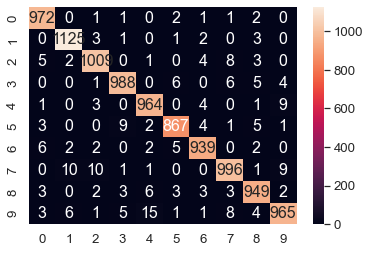

In [4]:
test_y_pred = clf.predict(test_x)
cm = metrics.confusion_matrix(test_y,test_y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2)
sns.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt="g")
plt.show()